In [29]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [30]:
# Charger les données
data = pd.read_excel('/kaggle/input/classe/base 2.xlsx')  # Remplacez 'data.csv' par le chemin de votre fichier

# Afficher les premières lignes
print(data.head(10))
print('------------------------------------------------------------------------------------------------')
# Vérifier les types et les valeurs manquantes
print(data.info())
print('------------------------------------------------------------------------------------------------')
print(data.isnull().sum())
print(data.dropna())
print('------------------------------------------------------------------------------------------------')
data.drop('Nom et prénom', axis=1, inplace=True)
# Statistiques descriptives
print(data.describe())


        Nom et prénom  Note de communication  Note des mathématiques  \
0         Zakka Yahya                   17.5                    16.5   
1  Chahir Mohamed Ali                   19.0                    13.0   
2      El Baski Basma                   14.0                    10.0   
3         Baba Lamyae                   12.0                    11.0   
4    Andaloussi Malak                    8.0                     9.5   
5        Sidlkhir Aya                   14.0                    11.0   
6        Zahri Yasser                   17.0                    12.0   
7        Sadiki Inase                   19.0                    12.0   
8        Elfasi Houda                   12.0                    10.0   
9  Boumaryoud Mohssin                    5.0                     7.0   

   Note d'informatique  Note du prétest  test formatif 1  test formatif 2  \
0                 20.0             15.0             13.0             12.0   
1                 18.0             13.0             1

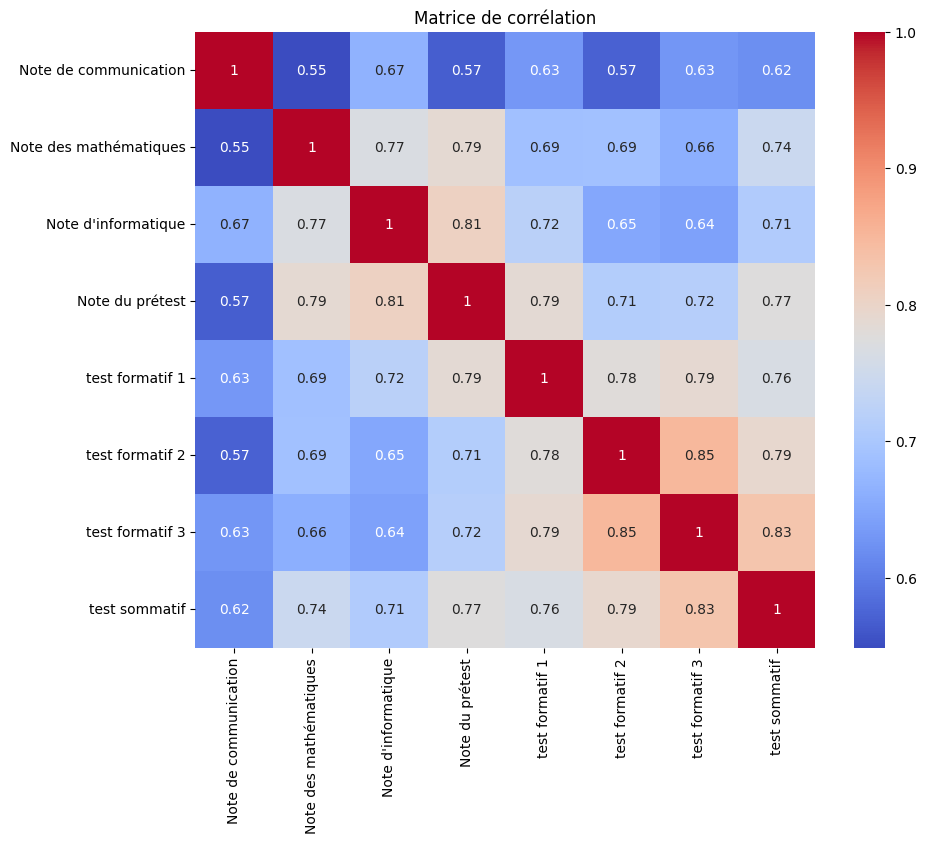

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


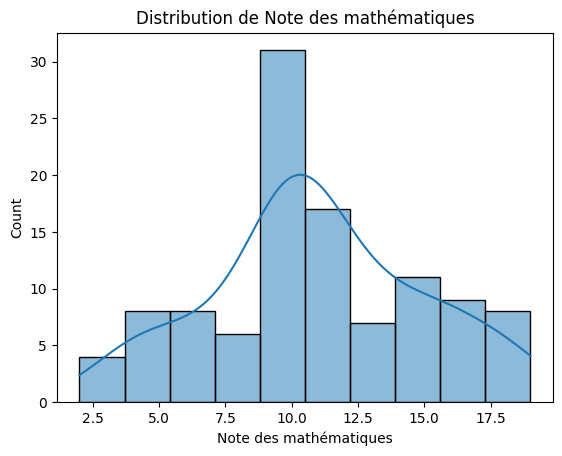

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


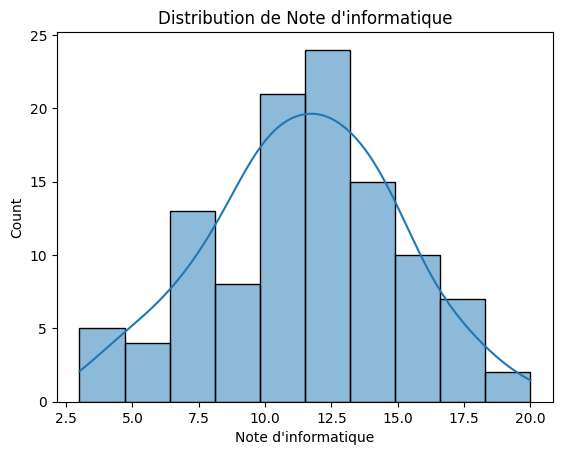

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


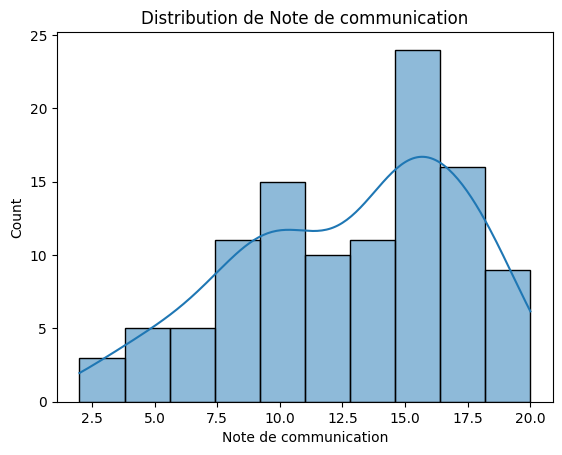

In [31]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

# Visualisation des distributions
for column in ['Note des mathématiques', "Note d'informatique", 'Note de communication']:
    sns.histplot(data[column], kde=True, bins=10)
    plt.title(f'Distribution de {column}')
    plt.show()

In [32]:
# Assuming 'groupe' is the column containing the categories
grouped_data = data.groupby('test sommatif')

# To view the groups
for group, group_df in grouped_data:
    print(f"Group: {group}\t")
    print(group_df.head())  # Display the first few rows of each group
    
print("------------------------------------------------------------------------------------")

grouped_means = grouped_data.mean(numeric_only=True)

# Print the grouped means
print(grouped_means)

# Add a new column 'Group' based on the specified conditions
def assign_group(value):
    if value >= 15:
        return 'C'
    elif 10 <= value < 15:
        return 'B'
    else:
        return 'A'

# Apply the function to a specific column (e.g., 'test sommatif') to create the 'Group' column
data['Group'] = data['test sommatif'].apply(assign_group)

# Display the first few rows to verify the changes
print(data[['test sommatif', 'Group']].head())
print("------------------------------------------------------------------------------------")
print(data.head())

Group: 3.5	
    Note de communication  Note des mathématiques  Note d'informatique  \
81                   10.0                     6.0                 10.0   

    Note du prétest  test formatif 1  test formatif 2  test formatif 3  \
81              9.5              5.0              4.5              4.0   

    test sommatif  
81            3.5  
Group: 4.0	
    Note de communication  Note des mathématiques  Note d'informatique  \
15                    2.0                     3.5                  4.0   
35                    6.0                     5.5                  7.0   

    Note du prétest  test formatif 1  test formatif 2  test formatif 3  \
15              7.0              9.0              8.0              7.0   
35              4.5              8.0              9.0              9.0   

    test sommatif  
15            4.0  
35            4.0  
Group: 4.5	
    Note de communication  Note des mathématiques  Note d'informatique  \
44                   10.0                     

In [33]:
# Variables indépendantes (X) et dépendante (y)
y = data['Group']  # Colonne cible
X = data.drop(['Group'], axis=1) # Supprimez 'groupe' (cible) des prédicteurs
x = data.dropna()

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données (optionnelle)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

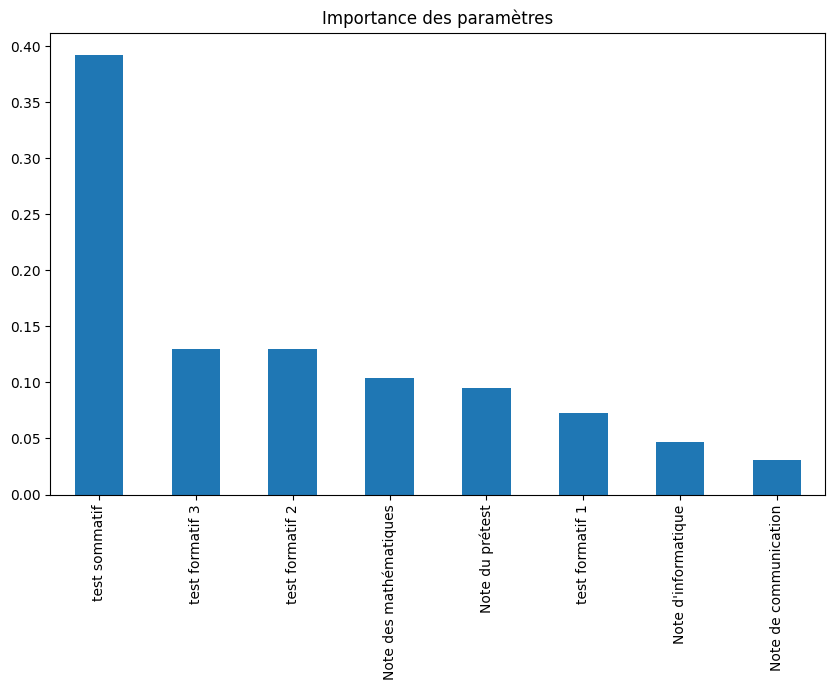

Feature selection completed!


In [34]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Visualize feature importance
feature_importances = pd.Series(rf.feature_importances_, index=data.drop(['Group'], axis=1).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Importance des paramètres')
plt.show()

# Select important features
selector = SelectFromModel(rf, threshold='mean')  # Threshold based on mean importance
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print("Feature selection completed!")


In [36]:
# Modèle de classification (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train_selected, y_train)

# Prédiction
y_pred = model.predict(X_test_selected)

# Évaluation
print('Rapport de classification :\n', classification_report(y_test, y_pred))
print('Précision du modèle :', accuracy_score(y_test, y_pred))

Rapport de classification :
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       1.00      1.00      1.00        13
           C       1.00      1.00      1.00         4

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Précision du modèle : 1.0
